In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
from sklearn.metrics import *
import cv2
from google.colab.patches import cv2_imshow

from random import seed
from random import randint
import shutil
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

2.11.0


In [ ]:
os.getcwd()

'/content'

In [ ]:
import os   
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_'

In [ ]:
%cd /content/gdrive/MyDrive/course-IA2/Proyecto/dataset_

/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_


In [ ]:
!ls

data  kaggle.json


In [ ]:
!kaggle datasets download -dsartajbhuvaji/brain-tumor-classification-mri

 84% 73.0M/86.8M [00:01<00:00, 80.5MB/s]
100% 86.8M/86.8M [00:01<00:00, 69.0MB/s]


In [ ]:
!ls

data  kaggle.json


In [ ]:
!mkdir data
!mv brain-tumor-classification-mri.zip data

In [ ]:
%cd data

/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data


In [ ]:
!unzip brain-tumor-classification-mri.zip

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

In [ ]:

base="/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/Training"

g_train=os.path.join(base,"glioma_tumor")
m_train=os.path.join(base,"meningioma_tumor")
n_train=os.path.join(base,"no_tumor")
p_train=os.path.join(base,"pituitary_tumor")

In [ ]:
print(" Imágenes para g_train",len(os.listdir(g_train)))
print(" Imágenes para m_train",len(os.listdir(m_train)))
print(" Imágenes para n_train",len(os.listdir(n_train)))
print(" Imágenes para p_train",len(os.listdir(p_train)))
print("EXISTE UN DESBALANCEO PARA LA CLASE NO TUMOR,EL ACCURACY PODRÍA NO SER UNA BUENA MÉTRICA")

 Imágenes para g_train 826
 Imágenes para m_train 822
 Imágenes para n_train 395
 Imágenes para p_train 827
EXISTE UN DESBALANCEO PARA LA CLASE NO TUMOR,EL ACCURACY PODRÍA NO SER UNA BUENA MÉTRICA


In [ ]:
base2="/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/Testing"
g_test=os.path.join(base2,"glioma_tumor")
m_test=os.path.join(base2,"meningioma_tumor")
n_test=os.path.join(base2,"no_tumor")
p_test=os.path.join(base2,"pituitary_tumor")

In [ ]:
print(" Imágenes para g_test",len(os.listdir(g_test)))
print(" Imágenes para m_test",len(os.listdir(m_test)))
print(" Imágenes para n_test",len(os.listdir(n_test)))
print(" Imágenes para p_test",len(os.listdir(p_test)))


 Imágenes para g_test 100
 Imágenes para m_test 115
 Imágenes para n_test 105
 Imágenes para p_test 74


In [ ]:
model_CNN = tf.keras.models.Sequential()

# Capa convolucional 1
model_CNN.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model_CNN.add(tf.keras.layers.BatchNormalization())
model_CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model_CNN.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.BatchNormalization())
model_CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 3
model_CNN.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.BatchNormalization())
model_CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 4
model_CNN.add(tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.BatchNormalization())
model_CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Capa de aplanado
model_CNN.add(tf.keras.layers.Flatten())

# Capa completamente conectada 1
model_CNN.add(tf.keras.layers.Dense(512, activation='relu'))
model_CNN.add(tf.keras.layers.BatchNormalization())

# Capa completamente conectada 2
model_CNN.add(tf.keras.layers.Dense(256, activation='relu'))
model_CNN.add(tf.keras.layers.BatchNormalization())

# Capa de salida
model_CNN.add(tf.keras.layers.Dense(4, activation='softmax'))

# Imprime el resumen de la arquitectura de la red neuronal
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 128)    512       
 hNormalization)                                                 
                                                        

In [ ]:
# Definir la función de optimización
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Definir la función de pérdida
loss = tf.keras.losses.CategoricalCrossentropy()

# Definir las métricas de evaluación
metrics = [tf.keras.metrics.CategoricalAccuracy()]

# Compilar el modelo
model_CNN.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    base,target_size=(224,224),batch_size=20,class_mode="categorical")


Found 2870 images belonging to 4 classes.


In [ ]:
test_generator=test_datagen.flow_from_directory(
    base2,target_size=(224,224),batch_size=20,class_mode="categorical")

Found 394 images belonging to 4 classes.


In [ ]:
#DEMUESTRA QUE EL GENERADOR, HACE INFINIDAD DE MUESTRAS SI NO SE DETIENE!
for data_batch,labels_batch in test_generator:
  print('data batch shape', data_batch.shape)



data batch shape (20, 224, 224, 3)
data batch shape (20, 224, 224, 3)
data batch shape (20, 224, 224, 3)
data batch shape (20, 224, 224, 3)
data batch shape (20, 224, 224, 3)
data batch shape (20, 224, 224, 3)
data batch shape (20, 224, 224, 3)
data batch shape (20, 224, 224, 3)
data batch shape (20, 224, 224, 3)
data batch shape (20, 224, 224, 3)
data batch shape (20, 224, 224, 3)


KeyboardInterrupt: ignored

In [ ]:
fnames=[os.path.join(n_train,fname) for fname in os.listdir(n_train)]
img_path=fnames[3]
img=image.image_utils.load_img(img_path,target_size=(224,224))
x=image.image_utils.img_to_array(img)
x=x.reshape(-1,224,224,3)
x.shape


(1, 224, 224, 3)

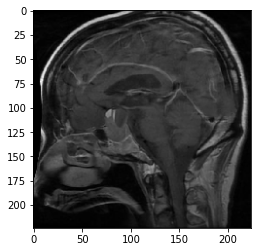

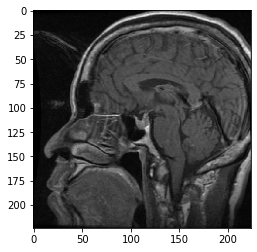

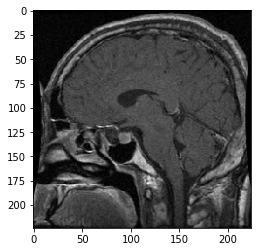

In [ ]:
i=0
for data_batch,labels_batch in train_generator:
  i+=1
  a=data_batch[1:4]
  b=labels_batch[1:4]
  if i%1==0:
    break


for i in a:
  plt.imshow(i) 

  plt.show()  


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Definir el número de pasos por época en función del tamaño del conjunto de entrenamiento y el tamaño del lote
steps_per_epoch = train_generator.samples // train_generator.batch_size

# Definir el número de épocas
epochs = 50

# Definir el número de pasos de validación en función del tamaño del conjunto de prueba y el tamaño del lote
validation_steps = test_generator.samples // test_generator.batch_size

# Ajustar el modelo al conjunto de entrenamiento


Epoch 1/50
143/143 [==============================] - 23s 160ms/step - loss: 0.1130 - categorical_accuracy: 0.9607 - val_loss: 3.3089 - val_categorical_accuracy: 0.7079
Epoch 2/50
143/143 [==============================] - 22s 154ms/step - loss: 0.0592 - categorical_accuracy: 0.9796 - val_loss: 2.8049 - val_categorical_accuracy: 0.7632
Epoch 3/50
143/143 [==============================] - 23s 161ms/step - loss: 0.0424 - categorical_accuracy: 0.9867 - val_loss: 2.4379 - val_categorical_accuracy: 0.7579
Epoch 4/50
143/143 [==============================] - 22s 154ms/step - loss: 0.0254 - categorical_accuracy: 0.9933 - val_loss: 2.6215 - val_categorical_accuracy: 0.7763
Epoch 5/50
143/143 [==============================] - 24s 167ms/step - loss: 0.0198 - categorical_accuracy: 0.9954 - val_loss: 2.5125 - val_categorical_accuracy: 0.7342
Epoch 6/50
143/143 [==============================] - 23s 163ms/step - loss: 0.0309 - categorical_accuracy: 0.9881 - val_loss: 2.3335 - val_categorical_acc

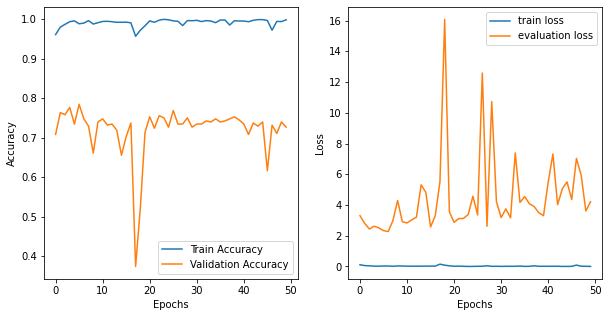

In [ ]:
import matplotlib.pyplot as plt
#history = model_CNN.fit(x_train, y_train, epochs=10,verbose=0, batch_size=64,validation_data=(x_test, y_test))
#history=model_CNN.fit_generator(
 #   train_generator,steps_per_epoch=143,
 #   epochs=30,validation_data=(test_generator),validation_steps=19)

history= model_CNN.fit(train_generator,
                        steps_per_epoch=steps_per_epoch,
                        epochs=epochs,
                        validation_data=test_generator,
                        validation_steps=validation_steps)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN.save('content/CNNTUMOR.h5')

In [ ]:
test_generator=test_datagen.flow_from_directory(
    base2,target_size=(224,224),batch_size=20,class_mode="categorical"
)


In [ ]:
test_loss,test_acc=model_CNN.evaluate_generator(test_generator,steps=50)
print("test acc:",test_acc)

<ipython-input-49-683fab83a05e>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss,test_acc=model_CNN.evaluate_generator(test_generator,steps=50)


test acc: 0.7309644818305969


#DATA AUGMENTATION

In [ ]:
#Prueba con Data Augmentation

datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
!ls


brain-tumor-classification-mri.zip  content  Testing  Training


In [ ]:
os.listdir("Training/pituitary_tumor")

img=os.listdir("Training/pituitary_tumor")
img

['p (1).jpg',
 'p (10).jpg',
 'p (100).jpg',
 'p (101).jpg',
 'p (102).jpg',
 'p (103).jpg',
 'p (104).jpg',
 'p (105).jpg',
 'p (106).jpg',
 'p (107).jpg',
 'p (108).jpg',
 'p (109).jpg',
 'p (11).jpg',
 'p (110).jpg',
 'p (111).jpg',
 'p (112).jpg',
 'p (113).jpg',
 'p (114).jpg',
 'p (115).jpg',
 'p (116).jpg',
 'p (117).jpg',
 'p (118).jpg',
 'p (119).jpg',
 'p (12).jpg',
 'p (120).jpg',
 'p (121).jpg',
 'p (122).jpg',
 'p (123).jpg',
 'p (124).jpg',
 'p (125).jpg',
 'p (126).jpg',
 'p (127).jpg',
 'p (128).jpg',
 'p (129).jpg',
 'p (13).jpg',
 'p (130).jpg',
 'p (131).jpg',
 'p (132).jpg',
 'p (133).jpg',
 'p (134).jpg',
 'p (135).jpg',
 'p (136).jpg',
 'p (137).jpg',
 'p (138).jpg',
 'p (139).jpg',
 'p (14).jpg',
 'p (140).jpg',
 'p (141).jpg',
 'p (142).jpg',
 'p (143).jpg',
 'p (144).jpg',
 'p (145).jpg',
 'p (146).jpg',
 'p (147).jpg',
 'p (148).jpg',
 'p (149).jpg',
 'p (15).jpg',
 'p (150).jpg',
 'p (151).jpg',
 'p (152).jpg',
 'p (153).jpg',
 'p (154).jpg',
 'p (155).jpg',


In [ ]:
img=image.image_utils.load_img("Training/glioma_tumor/gg (200).jpg",target_size=(224,224))

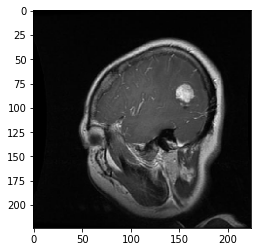

In [ ]:
plt.imshow(img)

In [ ]:
img=keras.utils.img_to_array(img,data_format='channels_last')

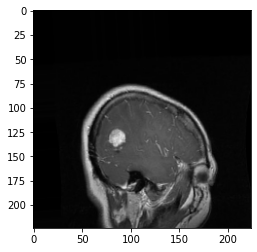

In [ ]:
i=0
for a in datagen.flow(img.reshape(-1,224,224,3),batch_size=1):
 i=i+1
 plt.imshow((a.reshape(224,224,3))/255)
 if i==1:
   break

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_CNN_AU = tf.keras.models.Sequential()

# Capa convolucional 1
model_CNN_AU.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model_CNN_AU.add(tf.keras.layers.BatchNormalization())
model_CNN_AU.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model_CNN_AU.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_CNN_AU.add(tf.keras.layers.BatchNormalization())
model_CNN_AU.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 3
model_CNN_AU.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_CNN_AU.add(tf.keras.layers.BatchNormalization())
model_CNN_AU.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 4
model_CNN_AU.add(tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_CNN_AU.add(tf.keras.layers.BatchNormalization())
model_CNN_AU.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Capa de aplanado
model_CNN_AU.add(tf.keras.layers.Flatten())

# Capa completamente conectada 1
model_CNN_AU.add(tf.keras.layers.Dense(512, activation='relu'))
model_CNN_AU.add(tf.keras.layers.BatchNormalization())

# Capa completamente conectada 2
model_CNN_AU.add(tf.keras.layers.Dense(256, activation='relu'))
model_CNN_AU.add(tf.keras.layers.BatchNormalization())

# Capa de salida
model_CNN_AU.add(tf.keras.layers.Dense(4, activation='softmax'))

# Imprime el resumen de la arquitectura de la red neuronal
model_CNN_AU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 128)    512       
 hNormalization)                                                 
                                                        

In [ ]:
'''from scipy.ndimage import gaussian_filter
from scipy.ndimage.interpolation import map_coordinates
import numpy as np
import cv2 as cv
def preprocess_image(img):

    # Aplica una normalización del histograma
    img = (img - np.mean(img)) / np.std(img)

    # Aplica una transformación de deformación elástica
    img = elastic_transform(img, alpha=100, sigma=10)

    return img

def elastic_transform(image, alpha, sigma):
    random_state = np.random.RandomState(None)
    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dz = np.zeros_like(dx)
    x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1)), np.reshape(z+dz, (-1, 1))
    return map_coordinates(image, indices, order=1).reshape(shape)
'''

In [ ]:
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 #   preprocessing_function=preprocess_image)

test_datagen2 = ImageDataGenerator(
    rescale=1./255)
  #  preprocessing_function=preprocess_image)




In [ ]:
train_generator2=train_datagen2.flow_from_directory(
    base,target_size=(224,224),batch_size=20,class_mode="categorical")

test_generator2=test_datagen2.flow_from_directory(
    base2,target_size=(224,224),batch_size=20,class_mode="categorical")

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:

optim=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)
model_CNN_AU.compile(optimizer=optim,
              loss='CategoricalCrossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy()])



In [ ]:
# Definir el número de pasos por época en función del tamaño del conjunto de entrenamiento y el tamaño del lote
steps_per_epoch = train_generator2.samples // train_generator2.batch_size

# Definir el número de épocas
epochs = 50

# Definir el número de pasos de validación en función del tamaño del conjunto de prueba y el tamaño del lote
validation_steps = test_generator2.samples // test_generator2.batch_size

# Ajustar el modelo al conjunto de entrenamiento


Epoch 1/50
143/143 [==============================] - 60s 381ms/step - loss: 1.2122 - categorical_accuracy: 0.5579 - val_loss: 6.1890 - val_categorical_accuracy: 0.2658
Epoch 2/50
143/143 [==============================] - 50s 352ms/step - loss: 0.9247 - categorical_accuracy: 0.6263 - val_loss: 8.3384 - val_categorical_accuracy: 0.2737
Epoch 3/50
143/143 [==============================] - 49s 345ms/step - loss: 0.8157 - categorical_accuracy: 0.6747 - val_loss: 4.1404 - val_categorical_accuracy: 0.3053
Epoch 4/50
143/143 [==============================] - 50s 352ms/step - loss: 0.7141 - categorical_accuracy: 0.7109 - val_loss: 2.1220 - val_categorical_accuracy: 0.4395
Epoch 5/50
143/143 [==============================] - 51s 359ms/step - loss: 0.6543 - categorical_accuracy: 0.7432 - val_loss: 3.7219 - val_categorical_accuracy: 0.3500
Epoch 6/50
143/143 [==============================] - 50s 352ms/step - loss: 0.6349 - categorical_accuracy: 0.7607 - val_loss: 2.8770 - val_categorical_acc

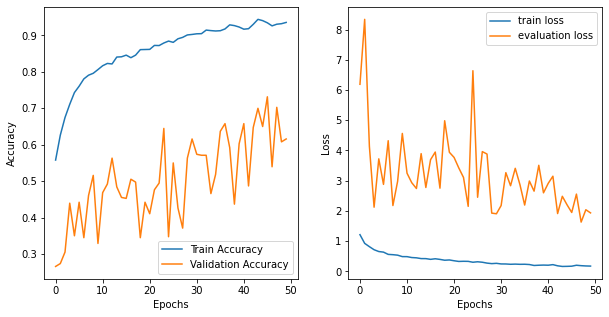

In [ ]:
import matplotlib.pyplot as plt
#history = model_CNN.fit(x_train, y_train, epochs=10,verbose=0, batch_size=64,validation_data=(x_test, y_test))
#history=model_CNN_AU.fit_generator(
 #   train_generator2,steps_per_epoch=143,
#    epochs=30,validation_data=(test_generator2),validation_steps=19)
history = model_CNN_AU.fit(train_generator2,
                        steps_per_epoch=steps_per_epoch,
                        epochs=epochs,
                        validation_data=test_generator2,
                        validation_steps=validation_steps)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_AU.save('content/CNN_AU_TUMOR.h5')

In [ ]:
test_loss,test_acc=model_CNN_AU.evaluate_generator(test_generator,steps=50)
print("test acc:",test_acc)

#TRANSFER LEARNING

In [ ]:
#Instanciación de la Inception V3
from keras.applications import InceptionV3

#convol_base=InceptionV3(
 #   include_top=False,
 #   weights="imagenet",
  #  input_shape=(224,224,3))


model_A =  tf.keras.applications.InceptionV3(
    input_shape=(224,224,3), weights=None, include_top=False)
model_A.trainable = False
model_A.summary()
 #   pooling=None,
 #   classes=1000,
#  classifier_activation="softmax")

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    base,target_size=(224,224),batch_size=20,class_mode="categorical")
test_generator=test_datagen.flow_from_directory(
    base2,target_size=(224,224),batch_size=20,class_mode="categorical")

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
prediction_layer = tf.keras.layers.Dense(4, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()


In [ ]:
model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])

In [ ]:
model_A.trainable = True
print("Total ayers of InceptionV3: ", len(model_A.layers))
for layer in model_A.layers[:250]:
  layer.trainable =  False

Total ayers of InceptionV3:  311


In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.000002)
model_B_on_A.compile(optimizer=optim,
              loss='CategoricalCrossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy()])
         

In [ ]:
# Definir el número de pasos por época en función del tamaño del conjunto de entrenamiento y el tamaño del lote
steps_per_epoch = train_generator.samples // train_generator.batch_size

# Definir el número de épocas
epochs = 20

# Definir el número de pasos de validación en función del tamaño del conjunto de prueba y el tamaño del lote
validation_steps = test_generator.samples // test_generator.batch_size

# Ajustar el modelo al conjunto de entrenamiento

In [ ]:
'''optim=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)
model_CNN_TR.compile(optimizer=optim,
              loss='CategoricalCrossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy()])
'''

Epoch 1/20
143/143 [==============================] - 561s 4s/step - loss: 1.1300 - categorical_accuracy: 0.5463 - val_loss: 1.5713 - val_categorical_accuracy: 0.1868
Epoch 2/20
143/143 [==============================] - 583s 4s/step - loss: 0.9201 - categorical_accuracy: 0.6495 - val_loss: 1.7470 - val_categorical_accuracy: 0.1895
Epoch 3/20
143/143 [==============================] - 545s 4s/step - loss: 0.8465 - categorical_accuracy: 0.6632 - val_loss: 1.5983 - val_categorical_accuracy: 0.2947
Epoch 4/20
143/143 [==============================] - 578s 4s/step - loss: 0.7820 - categorical_accuracy: 0.6902 - val_loss: 1.4570 - val_categorical_accuracy: 0.3789
Epoch 5/20
143/143 [==============================] - 578s 4s/step - loss: 0.7413 - categorical_accuracy: 0.7133 - val_loss: 1.5209 - val_categorical_accuracy: 0.3974
Epoch 6/20
143/143 [==============================] - 577s 4s/step - loss: 0.6889 - categorical_accuracy: 0.7432 - val_loss: 1.6604 - val_categorical_accuracy: 0.400

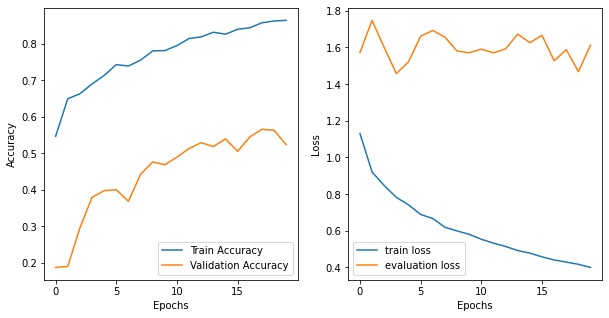

In [ ]:
import matplotlib.pyplot as plt
#history = model_CNN.fit(x_train, y_train, epochs=10,verbose=0, batch_size=64,validation_data=(x_test, y_test))
#history=model_CNN_AU.fit_generator(
#   train_generator2,steps_per_epoch=143,
#    epochs=30,validation_data=(test_generator2),validation_steps=19)
history = model_B_on_A.fit(train_generator,
                        steps_per_epoch=steps_per_epoch,
                        epochs=epochs,
                        validation_data=test_generator,
                        validation_steps=validation_steps)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_B_on_A.save('content/CNN_TUMOR_TR_20.h5')

#AUTOENCODERS

#Tratamiento alternativo



In [ ]:




import cv2
from google.colab.patches import cv2_imshow

from random import seed
from random import randint
import shutil

#Glioma
a=os.listdir("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/Training/glioma_tumor/")
z=0
for i in a:
  route=("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/Training/glioma_tumor/"+str(i))
  
  destin=("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/x_train/"+"g_"+str(z))
  print(destin)
  z=z+1
  shutil.move(route, destin)
  



In [ ]:
#Meningioma
a=os.listdir("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/Training/meningioma_tumor/")
z=0
for i in a:
  route=("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/Training/meningioma_tumor/"+str(i))
  
  destin=("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/x_train/"+"m_"+str(z))
  print(destin)
  z=z+1
  shutil.move(route, destin)


#No tumor
a=os.listdir("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/Training/no_tumor/")
z=0
for i in a:
  route=("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/Training/no_tumor/"+str(i))
  
  destin=("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/x_train/"+"n_"+str(z))
  print(destin)
  z=z+1
  shutil.move(route, destin)
  
#Pituitario
a=os.listdir("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/Training/pituitary_tumor/")
z=0
for i in a:
  route=("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/Training/pituitary_tumor/"+str(i))
  
  destin=("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/x_train/"+"p_"+str(z))
  print(destin)
  z=z+1
  shutil.move(route, destin)
  

In [ ]:
img = cv2.imread("/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/x_train/n_380.jpg")


In [ ]:
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
from pandas.core.internals.blocks import F
l = ["/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/x_train/"+f for f in os.listdir('/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/x_train')]
print(l)



In [ ]:
l2=[]
for f in os.listdir('/content/gdrive/MyDrive/course-IA2/Proyecto/dataset_/data/x_train'):
  if(f[0]=='g'): l2.append(1)
  if(f[0]=='m'): l2.append(2)
  if(f[0]=='p'): l2.append(3)
  if(f[0]=='n'): l2.append(0)

In [ ]:
print(l2)

In [ ]:
import imageio
import numpy as np

df = pd.DataFrame({'image': [cv2.cvtColor((cv2.resize(imageio.imread(f),(224,224))),cv2.COLOR_RGB2GRAY) for f in l]})



In [ ]:
df.head()

In [ ]:
df = df.assign(label=l2)

df.columns

In [ ]:
plt.imshow(df.iloc[5,0])

In [ ]:
array = df.to_numpy()

In [ ]:
array.shape

In [ ]:
for f in array[:,0]:
  array[f,0]=array[f,0].reshape([-1, 224, 224])


In [ ]:
array[1,0].shape

In [ ]:
array[f,0]=[array[f,0].reshape([-1, 224, 224]) for f in array[:,0]]

In [ ]:
type(array)

In [ ]:
[array[f,0].astype('float32') for f in array[:,0]]

In [ ]:
x_train=array[:2280,0]
y_train=array[:2280,1]


x_test=array[2280:,0]
y_test=array[2280:,1]

x_train = x_train.astype('float32')


x_test = x_test.astype('float32')

In [ ]:
x_train = x_train.reshape([-1, 224, 224, 1])
x_test = x_test.reshape([-1, 224, 224, 1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test) #Se utiliza para aplicar One Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train) #Se utiliza para aplicar One Hot Encoding

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', x_test.shape[0], "y_test: ", y_test.shape)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))

In [ ]:
#@title **code student**. Compile
model.compile(optimizer='ADAGRAD',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10,verbose=0, batch_size=64,validation_data=(x_test, y_test))